Enter the name of the zone: Zone 1
Enter the number of columns for zone Zone 1: 9
Do you want to add another zone? (yes/no): yes
Enter the name of the zone: B
Enter the number of columns for zone B: 5
Do you want to add another zone? (yes/no): yes
Enter the name of the zone: Zone C
Enter the number of columns for zone Zone C: 7
Do you want to add another zone? (yes/no): no
Choose a zone to plant: Zone 1
Enter the name of the plant: Safran
Enter the starting month (4-11 for April to November): 4
Enter the ending month (4-11 for April to November): 11
Enter the starting column (1-9): 1
Enter the ending column (1-9): 2
Do you want to add another plant or zone? (yes/no): yes
Choose a zone to plant: Pois
Invalid zone. Choose a valid zone: Zone 1
Enter the name of the plant: Pois
Enter the starting month (4-11 for April to November): 4
Enter the ending month (4-11 for April to November): 5
Enter the starting column (1-9): 2
Enter the ending column (1-9): 3
Do you want to add another plant or

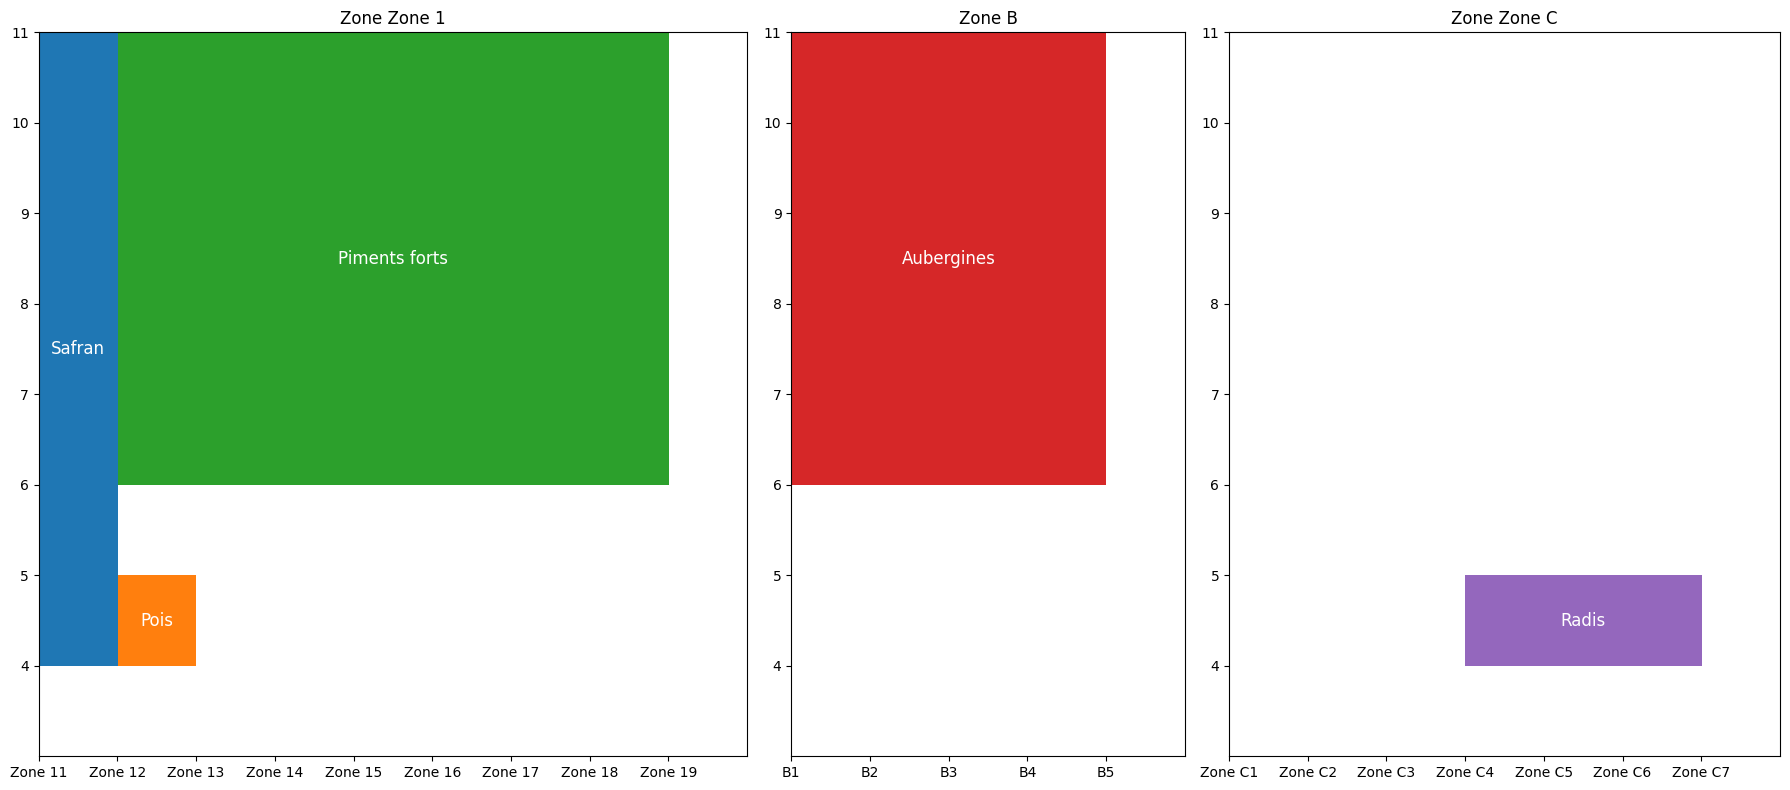

In [3]:
import matplotlib.pyplot as plt
import numpy as np

map_height = 8

# Create a function to generate the initial map
def create_map(zone_sizes):
    map_dict = {}
    for zone, width in zone_sizes.items():
        map_dict[zone] = np.ones((map_height, width), dtype=int) * -1  # Initialize with -1 for white background
    return map_dict

# Function to add a crop to the map
def add_crop(map_dict, zone, crop_name, start_month, end_month, start_col, end_col, color_dict):
    if crop_name not in color_dict:
        # Assign a new color index if the crop name is not in the dictionary
        color_dict[crop_name] = len(color_dict)
    color_index = color_dict[crop_name]
    for row in range(start_month - 4, end_month - 3):  # Convert month to 0-indexed row
        map_dict[zone][row, start_col-1:end_col] = color_index
    return color_index  # Return color index for text coloring

# Main function to run the crop management system
def main():
    color_dict = {}
    zone_sizes = {}

    while True:
        zone = input("Enter the name of the zone: ").strip()
        zone_size = int(input(f"Enter the number of columns for zone {zone}: "))
        zone_sizes[zone] = zone_size

        more_zones = input("Do you want to add another zone? (yes/no): ").strip().lower()
        if more_zones != 'yes':
            break

    plant_map = create_map(zone_sizes)

    while True:
        zone = input("Choose a zone to plant: ").strip()
        while zone not in zone_sizes:
            zone = input("Invalid zone. Choose a valid zone: ").strip()
        
        crop_name = input("Enter the name of the plant: ").strip()
        start_month = int(input("Enter the starting month (4-11 for April to November): "))+1
        end_month = int(input("Enter the ending month (4-11 for April to November): "))
        start_col = int(input(f"Enter the starting column (1-{zone_sizes[zone]}): "))
        end_col = int(input(f"Enter the ending column (1-{zone_sizes[zone]}): "))-1

        color_index = add_crop(plant_map, zone, crop_name, start_month, end_month, start_col, end_col, color_dict)

        more = input("Do you want to add another plant or zone? (yes/no): ").strip().lower()
        if more != 'yes':
            break

    # Define a colormap
    colors = ['white', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    cmap = plt.cm.colors.ListedColormap(colors[:len(color_dict) + 1])

    # Visualize the map for all zones
    total_columns = sum(zone_sizes.values())
    fig, axes = plt.subplots(1, len(zone_sizes), figsize=(18, 8), gridspec_kw={'width_ratios': list(zone_sizes.values())})

    for ax, (zone, width) in zip(axes, zone_sizes.items()):
        zone_data = plant_map[zone]
        x_ticks = np.arange(0, width)
        x_labels = [f'{zone}{j+1}' for j in range(width)]  # Adjust labels to start from 1
        im = ax.imshow(zone_data, cmap=cmap, extent=[0, width, 0, 8], aspect="auto", vmin=-1, vmax=len(color_dict))
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)

        # Annotate the plant names
        for crop_name, color_index in color_dict.items():
            indices = np.argwhere(zone_data == color_index)
            if indices.size > 0:
                mid_row = indices[:, 0].mean()
                mid_col = indices[:, 1].mean()
                ax.text(mid_col + 0.5, 8 - mid_row - 0.5, crop_name, ha='center', va='center', color='white', fontsize=12)

        ax.set_ylim(8, 0)  # Reverse the y-axis limits
        y_ticks = np.arange(0, 8, 1)
        y_labels = [f'{m}' for m in range(4, 12)]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels[::-1])  # Reverse the month labels to match the reversed y-axis
        ax.set_title(f'Zone {zone}')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
